<a href="https://colab.research.google.com/github/rjathan7/Stock-Market-Predictor/blob/main/StockMarket.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import yfinance as yf

/usr/local/lib/python3.10/dist-packages/yfinance/base.py:48: FutureWarning: The default dtype for empty Series will be 'object' instead of 'float64' in a future version. Specify a dtype explicitly to silence this warning.
  _empty_series = pd.Series()


In [2]:
sp500 = yf.Ticker("^GSPC") # initialize ticker class to download price history for a single symbol

In [3]:
sp500 = sp500.history(period="max") # query all data from beggining when index was created

In [4]:
sp500

,Open,High,Low,Close,Volume,Dividends,Stock Splits
Date,,,,,,,
1927-12-30 00:00:00-05:00,17.660000,17.660000,17.660000,17.660000,0,0.0,0.0
1928-01-03 00:00:00-05:00,17.760000,17.760000,17.760000,17.760000,0,0.0,0.0
1928-01-04 00:00:00-05:00,17.719999,17.719999,17.719999,17.719999,0,0.0,0.0
1928-01-05 00:00:00-05:00,17.549999,17.549999,17.549999,17.549999,0,0.0,0.0
1928-01-06 00:00:00-05:00,17.660000,17.660000,17.660000,17.660000,0,0.0,0.0
...,...,...,...,...,...,...,...
2024-02-02 00:00:00-05:00,4916.060059,4975.290039,4907.990234,4958.609863,3974350000,0.0,0.0
2024-02-05 00:00:00-05:00,4957.189941,4957.189941,4918.089844,4942.810059,4023640000,0.0,0.0
2024-02-06 00:00:00-05:00,4950.160156,4957.770020,4934.879883,4954.229980,4440880000,0.0,0.0


In [5]:
sp500.index

DatetimeIndex(['1927-12-30 00:00:00-05:00', '1928-01-03 00:00:00-05:00',
               '1928-01-04 00:00:00-05:00', '1928-01-05 00:00:00-05:00',
               '1928-01-06 00:00:00-05:00', '1928-01-09 00:00:00-05:00',
               '1928-01-10 00:00:00-05:00', '1928-01-11 00:00:00-05:00',
               '1928-01-12 00:00:00-05:00', '1928-01-13 00:00:00-05:00',
               ...
               '2024-01-26 00:00:00-05:00', '2024-01-29 00:00:00-05:00',
               '2024-01-30 00:00:00-05:00', '2024-01-31 00:00:00-05:00',
               '2024-02-01 00:00:00-05:00', '2024-02-02 00:00:00-05:00',
               '2024-02-05 00:00:00-05:00', '2024-02-06 00:00:00-05:00',
               '2024-02-07 00:00:00-05:00', '2024-02-08 00:00:00-05:00'],
              dtype='datetime64[ns, America/New_York]', name='Date', length=24142, freq=None)

<Axes: xlabel='Date'>

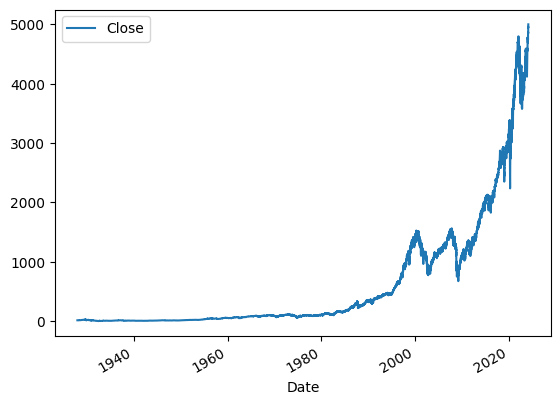

In [6]:
sp500.plot.line(y="Close", use_index=True) # show trading dates on x-axis, show closing price on y-axis

In [7]:
# remove columns, since their more appropriate for individual stocks not an index
del sp500["Dividends"]
del sp500["Stock Splits"]

Target: Will the price go up or down tomorrow?

In [8]:
sp500["Tomorrow"] = sp500["Close"].shift(-1) # create column called Tomorrow

In [9]:
sp500

,Open,High,Low,Close,Volume,Tomorrow
Date,,,,,,
1927-12-30 00:00:00-05:00,17.660000,17.660000,17.660000,17.660000,0,17.760000
1928-01-03 00:00:00-05:00,17.760000,17.760000,17.760000,17.760000,0,17.719999
1928-01-04 00:00:00-05:00,17.719999,17.719999,17.719999,17.719999,0,17.549999
1928-01-05 00:00:00-05:00,17.549999,17.549999,17.549999,17.549999,0,17.660000
1928-01-06 00:00:00-05:00,17.660000,17.660000,17.660000,17.660000,0,17.500000
...,...,...,...,...,...,...
2024-02-02 00:00:00-05:00,4916.060059,4975.290039,4907.990234,4958.609863,3974350000,4942.810059
2024-02-05 00:00:00-05:00,4957.189941,4957.189941,4918.089844,4942.810059,4023640000,4954.229980
2024-02-06 00:00:00-05:00,4950.160156,4957.770020,4934.879883,4954.229980,4440880000,4995.060059


Took the Close column and shifted all the prices back one day, so now Tomorrow has the next day's closing price

In [10]:
sp500["Target"] = (sp500["Tomorrow"] > sp500["Close"]).astype(int) # converts bool to int

In [11]:
sp500

,Open,High,Low,Close,Volume,Tomorrow,Target
Date,,,,,,,
1927-12-30 00:00:00-05:00,17.660000,17.660000,17.660000,17.660000,0,17.760000,1
1928-01-03 00:00:00-05:00,17.760000,17.760000,17.760000,17.760000,0,17.719999,0
1928-01-04 00:00:00-05:00,17.719999,17.719999,17.719999,17.719999,0,17.549999,0
1928-01-05 00:00:00-05:00,17.549999,17.549999,17.549999,17.549999,0,17.660000,1
1928-01-06 00:00:00-05:00,17.660000,17.660000,17.660000,17.660000,0,17.500000,0
...,...,...,...,...,...,...,...
2024-02-02 00:00:00-05:00,4916.060059,4975.290039,4907.990234,4958.609863,3974350000,4942.810059,0
2024-02-05 00:00:00-05:00,4957.189941,4957.189941,4918.089844,4942.810059,4023640000,4954.229980,1
2024-02-06 00:00:00-05:00,4950.160156,4957.770020,4934.879883,4954.229980,4440880000,4995.060059,1


1 when price went up, and 0 when price went down

In [12]:
# remove all data that came before 1990 since market could've shifted fundamentally
sp500 = sp500.loc["1990-01-01":].copy()

In [13]:
sp500

,Open,High,Low,Close,Volume,Tomorrow,Target
Date,,,,,,,
1990-01-02 00:00:00-05:00,353.399994,359.690002,351.980011,359.690002,162070000,358.760010,0
1990-01-03 00:00:00-05:00,359.690002,360.589996,357.890015,358.760010,192330000,355.670013,0
1990-01-04 00:00:00-05:00,358.760010,358.760010,352.890015,355.670013,177000000,352.200012,0
1990-01-05 00:00:00-05:00,355.670013,355.670013,351.350006,352.200012,158530000,353.790009,1
1990-01-08 00:00:00-05:00,352.200012,354.239990,350.540009,353.790009,140110000,349.619995,0
...,...,...,...,...,...,...,...
2024-02-02 00:00:00-05:00,4916.060059,4975.290039,4907.990234,4958.609863,3974350000,4942.810059,0
2024-02-05 00:00:00-05:00,4957.189941,4957.189941,4918.089844,4942.810059,4023640000,4954.229980,1
2024-02-06 00:00:00-05:00,4950.160156,4957.770020,4934.879883,4954.229980,4440880000,4995.060059,1


In [14]:
from sklearn.ensemble import RandomForestClassifier

# number of decision trees to train: 100, random state = 1 so numbers generated will be in predictable sequence each time
model = RandomForestClassifier(n_estimators=100, min_samples_split=100, random_state=1)

# avoid leaking information into the model so model can actually learn to predict without having future knowledge
train = sp500.iloc[:-100] # put all of the rows except the last 100 into training set
test = sp500.iloc[-100:] # put last 100 rows into test set

predictors = ["Close", "Volume", "Open", "High", "Low"]
model.fit(train[predictors], train["Target"]) # train model by using predictor columns to try and predict target

RandomForestClassifier(min_samples_split=100, random_state=1)

Measure model accuracy

In [15]:
from sklearn.metrics import precision_score

# presicion score: when we said market would go up when target was 1, did it actually go up
preds = model.predict(test[predictors]) # generate predictions using test set

In [16]:
import pandas as pd

preds = pd.Series(preds,index=test.index) # turn numpy array into a pandas series

In [17]:
# calculate precision score using actual Target and predicted Target
precision_score(test["Target"], preds)

0.5609756097560976

Could be better

In [18]:
# combine actual values with predicted values to plot predictions
combined = pd.concat([test["Target"], preds], axis=1) # axis=1 to treat each of these inputs as a column

<Axes: xlabel='Date'>

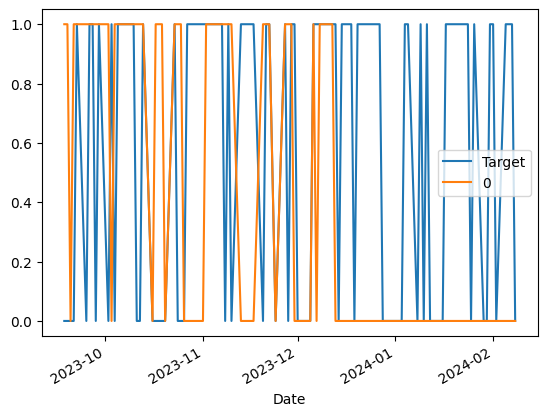

In [19]:
combined.plot()

Orange line is predictions. Blue line is what actually happened

Enable backtesting to be able to test across multiple years

In [20]:
# combine everything into one function
def predict(train, test, predictors, model):
  model.fit(train[predictors], train["Target"])
  preds = model.predict(test[predictors])
  preds = pd.Series(preds, index=test.index, name="Predictions")
  combined = pd.concat([test["Target"], preds], axis=1)
  return combined

In [21]:
# every trading year has around 250 days so train model using 10 years of data
# take first 10 years of data to predict values for eleventh year and so on
def backtest(data, model, predictors, start=2500, step=250):
  all_predictions = [] # list of data frames where each df is the prediction for a single year

  # loop across data year by year and make predictions for all years except for the first ten
  for i in range(start, data.shape[0], step):
    # split up training and test data
    train = data.iloc[0:i].copy() # all of the years prior to current year
    test = data.iloc[i:(i+step)].copy() # current year
    predictions = predict(train, test, predictors, model)
    all_predictions.append(predictions)
  return pd.concat(all_predictions) # combine all dfs into one df

In [22]:
predictions = backtest(sp500, model, predictors)

In [23]:
predictions["Predictions"].value_counts() # counts up how many times each prediction was made

0    3496
1    2596
Name: Predictions, dtype: int64

Predicted the market would go down around 3500 days and market would go up around 2500 days

In [24]:
precision_score(predictions["Target"], predictions["Predictions"])

0.5288906009244992

When stated the market would go up, it went up 53% of the time. As benchmark, look at the percentage of days where market actually went up

In [25]:
predictions["Target"].value_counts() / predictions.shape[0] # value counts of the target divided by total number of rows

1    0.5348
0    0.4652
Name: Target, dtype: float64

The SMP500 in the days looked at actually went up 53% and went down 47%

In [26]:
# create a variety of rolling means
# calc the mean close price in last 2 days, last trading week, last 3 months, last year and last 4 years
horizons = [2,5,60,250,1000]
new_predictors = [] # holds some of the new columns to be created

# loop through horizons
for horizon in horizons:
  rolling_averages = sp500.rolling(horizon).mean() # calc rolling avg against that horizon and take the mean

  ratio_column = f"Close_Ratio_{horizon}" # add new columns to sp500 dataset
  sp500[ratio_column] = sp500["Close"] / rolling_averages["Close"] # close price divided by rolling average

  trend_column = f"Trend_{horizon}" # number of days where stock price actually went up
  sp500[trend_column] = sp500.shift(1).rolling(horizon).sum()["Target"] # shift forward and find the rolling sum of the target
  # so going to look at the past few days and get the sum of the target

  new_predictors += [ratio_column, trend_column]

In [27]:
sp500 = sp500.dropna() # drop extra rows

In [28]:
sp500

,Open,High,Low,Close,Volume,Tomorrow,Target,Close_Ratio_2,Trend_2,Close_Ratio_5,Trend_5,Close_Ratio_60,Trend_60,Close_Ratio_250,Trend_250,Close_Ratio_1000,Trend_1000
Date,,,,,,,,,,,,,,,,,
1993-12-14 00:00:00-05:00,465.730011,466.119995,462.459991,463.059998,275050000,461.839996,0,0.997157,1.0,0.996617,1.0,1.000283,32.0,1.028047,127.0,1.176082,512.0
1993-12-15 00:00:00-05:00,463.059998,463.690002,461.839996,461.839996,331770000,463.339996,1,0.998681,0.0,0.995899,1.0,0.997329,32.0,1.025151,126.0,1.172676,512.0
1993-12-16 00:00:00-05:00,461.859985,463.980011,461.859985,463.339996,284620000,466.380005,1,1.001621,1.0,0.999495,2.0,1.000311,32.0,1.028274,127.0,1.176163,513.0
1993-12-17 00:00:00-05:00,463.339996,466.380005,463.339996,466.380005,363750000,465.850006,0,1.003270,2.0,1.004991,3.0,1.006561,32.0,1.034781,128.0,1.183537,514.0
1993-12-20 00:00:00-05:00,466.380005,466.899994,465.529999,465.850006,255900000,465.299988,0,0.999431,1.0,1.003784,2.0,1.005120,32.0,1.033359,128.0,1.181856,513.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2024-02-01 00:00:00-05:00,4861.109863,4906.970215,4853.520020,4906.189941,4386090000,4958.609863,1,1.006208,1.0,1.001439,2.0,1.050393,39.0,1.126078,136.0,1.225211,527.0
2024-02-02 00:00:00-05:00,4916.060059,4975.290039,4907.990234,4958.609863,3974350000,4942.810059,0,1.005314,2.0,1.009351,3.0,1.059375,39.0,1.137251,137.0,1.237813,527.0
2024-02-05 00:00:00-05:00,4957.189941,4957.189941,4918.089844,4942.810059,4023640000,4954.229980,1,0.998404,1.0,1.005526,2.0,1.053882,38.0,1.132763,137.0,1.233386,527.0


In [29]:
# increase number of estimators to 200 and reduce min sample split for higher accuracy
model = RandomForestClassifier(n_estimators=200, min_samples_split=50, random_state=1)

In [34]:
# edit previously defined function
def predict(train, test, predictors, model):
  model.fit(train[predictors], train["Target"])
  preds = model.predict_proba(test[predictors])[:,1] # returns probability that the stock price goes up
  # want to be more confident that the price will go up so set threshold to 60%
  # reduces the total number of trading days but increases the chance that the price goes up on those days
  preds[preds >= .6] = 1
  preds[preds < .6] = 0
  preds = pd.Series(preds, index=test.index, name="Predictions")
  combined = pd.concat([test["Target"], preds], axis=1)
  return combined

In [35]:
predictions = backtest(sp500, model, new_predictors)

In [36]:
predictions["Predictions"].value_counts()

0.0    4259
1.0     832
Name: Predictions, dtype: int64

With the improved prediction there's only around 800 days where the price will go up

In [38]:
precision_score(predictions["Target"], predictions["Predictions"])

0.5733173076923077

When the model predicts stock will go up, 57% of the time it will actually go up